In [1]:
from google.colab import auth
auth.authenticate_user()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import ee, folium

In [4]:
import ee
ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=7CHiWtberx62d2Td8Sq4GkB3nJ3r1Xn76V-fbtUaAcw&tc=vBfkbX_BZJWJNAcGWjBqW7R6K0QpnSM6NIQJ2AKuupY&cc=FtaX67e2EOTpr3pWqjzkVSrjZxhNQuiuu3gCYIKx2R0

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AdQt8qgLYjG0RZixDtafM96KijvCYVpz8ac-CE8UAdPN3NAEDuKyQbRHRbI

Successfully saved authorization token.


In [25]:
landsat = ee.Image('LANDSAT/LC08/C01/T1_TOA/LC08_123032_20140515').select(['B4', 'B3', 'B2'])

In [26]:
landsat

In [27]:
u_lon = 116.2621
u_lat = 39.8412
u_poi = ee.Geometry.Point(u_lon, u_lat)
# Create a buffer zone of 10 km around Lyon.
lyon = u_poi.buffer(10000)  # meters

In [8]:
task = ee.batch.Export.image.toDrive(image=landsat,
                                     description='landsat_image',
                                     scale=30,
                                     region=lyon,
                                     fileNamePrefix='landsat',
                                     crs='EPSG:4326',
                                     fileFormat='GeoTIFF'
                                     )
task.start()

In [28]:
!ls drive/MyDrive/landsat*

drive/MyDrive/landsat.tif


In [10]:
!sudo add-apt-repository ppa:ubuntugis/ppa

 Official stable UbuntuGIS packages.


 More info: https://launchpad.net/~ubuntugis/+archive/ubuntu/ppa
Press [ENTER] to continue or Ctrl-c to cancel adding it.

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
0% [1 InRelease gpgv 88.7 kB] [Waiting for headers] [Connecting to ppa.launchpa
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bion

In [11]:
!sudo apt-get update

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:14 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu bionic InRelease
Reading pac

In [12]:
!sudo apt-get install gdal-bin libgdal-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.4.2+dfsg-1~bionic0).
libgdal-dev is already the newest version (2.4.2+dfsg-1~bionic0).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 55 not upgraded.


In [13]:
!pip install -U pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pip-22.2.2-py3-none-any.whl (2.0 MB)
  Attempting uninstall: pip
    Found existing installation: pip 20.0.2
    Uninstalling pip-20.0.2:
      Successfully uninstalled pip-20.0.2


In [14]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached rasterio-1.2.10-cp37-cp37m-manylinux1_x86_64.whl (19.3 MB)
  Using cached snuggs-1.4.7-py3-none-any.whl (5.4 kB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached affine-2.3.1-py2.py3-none-any.whl (16 kB)


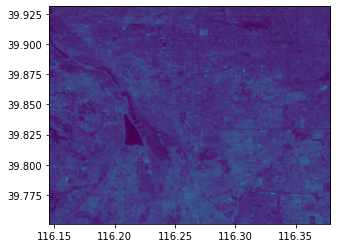

In [15]:
import rasterio
from rasterio.plot import show
fp = r'drive/MyDrive/landsat.tif'
img = rasterio.open(fp)
show(img)

In [16]:
print(img.count)

3


In [17]:
print(img.height, img.width)

669 865


In [18]:
print(img.crs)

EPSG:4326


In [19]:
import xarray as xr

In [20]:
da = xr.open_rasterio("drive/MyDrive/landsat.tif")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  """Entry point for launching an IPython kernel.


In [21]:
da

<xarray.DataArray (band: 3, y: 669, x: 865)>
[1736055 values with dtype=float32]
Coordinates:
  * band     (band) int64 1 2 3
  * y        (y) float64 39.93 39.93 39.93 39.93 ... 39.75 39.75 39.75 39.75
  * x        (x) float64 116.1 116.1 116.1 116.1 ... 116.4 116.4 116.4 116.4
Attributes:
    transform:      (0.00026949458523585647, 0.0, 116.14569836660849, 0.0, -0...
    crs:            +init=epsg:4326
    res:            (0.00026949458523585647, 0.00026949458523585647)
    is_tiled:       1
    nodatavals:     (nan, nan, nan)
    scales:         (1.0, 1.0, 1.0)
    offsets:        (0.0, 0.0, 0.0)
    descriptions:   ('B4', 'B3', 'B2')
    AREA_OR_POINT:  Area

In [31]:
da.shape

(3, 669, 865)

In [22]:
! wget https://repo.anaconda.com/archive/Anaconda3-2020.02-Linux-x86_64.sh
! chmod +x Anaconda3-2020.02-Linux-x86_64.sh
! bash ./Anaconda3-2020.02-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
! conda update -n base -c defaults conda -y
! conda config --add channels bioconda
! conda config --add channels conda-forge

--2022-08-31 04:41:22--  https://repo.anaconda.com/archive/Anaconda3-2020.02-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 546910666 (522M) [application/x-sh]
Saving to: ‘Anaconda3-2020.02-Linux-x86_64.sh.1’

Anaconda3-2020.02-L 100%[===================>] 521.57M  88.1MB/s    in 5.3s    

2022-08-31 04:41:28 (98.9 MB/s) - ‘Anaconda3-2020.02-Linux-x86_64.sh.1’ saved [546910666/546910666]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | 

In [23]:
!conda install -c conda-forge cartopy

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cartopy


The following NEW packages will be INSTALLED:

  cartopy            pkgs/main/linux-64::cartopy-0.18.0-py37h0d9ca2b_1
  geos               pkgs/main/linux-64::geos-3.8.0-he6710b0_0
  proj               conda-forge/linux-64::proj-6.2.1-hc80f0dc_0
  pyshp              conda-forge/noarch::pyshp-2.3.1-pyhd8ed1ab_0
  python_abi         conda-forge/linux-64::python_abi-3.7-2_cp37m
  shapely            pkgs/main/linux-64::shapely-1.7.1-py37h1728cc4_0

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              pkgs/main::conda-4.14.0-py37h06a4308_0 --> conda-forge::conda-4.1

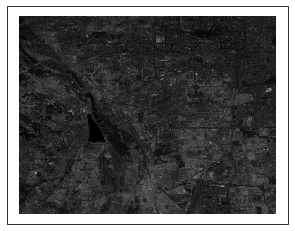

In [24]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from rasterio.warp import transform
import numpy as np

# Compute the lon/lat coordinates with rasterio.warp.transform
ny, nx = len(da['y']), len(da['x'])
x, y = np.meshgrid(da['x'], da['y'])

# Rasterio works with 1D arrays
lon, lat = transform(da.crs, {'init': 'EPSG:4326'},
                     x.flatten(), y.flatten())
lon = np.asarray(lon).reshape((ny, nx))
lat = np.asarray(lat).reshape((ny, nx))
da.coords['lon'] = (('y', 'x'), lon)
da.coords['lat'] = (('y', 'x'), lat)

# Compute a greyscale out of the rgb image
greyscale = da.mean(dim='band')

# Plot on a map
ax = plt.subplot(projection=ccrs.PlateCarree())
greyscale.plot(ax=ax, x='lon', y='lat', transform=ccrs.PlateCarree(),
               cmap='Greys_r', add_colorbar=False)
ax.coastlines('10m', color='r')

In [29]:
!gdal_translate -of netCDF drive/MyDrive/landsat.tif drive/MyDrive/landsat.nc

Input file size is 865, 669
0...10...20...30...40...50...60...70...80...90...100 - done.


In [30]:
!ls drive/MyDrive/landsat.nc

drive/MyDrive/landsat.nc


In [32]:
ds = xr.open_dataset('drive/MyDrive/landsat.nc')

In [33]:
ds

<xarray.Dataset>
Dimensions:  (lat: 669, lon: 865)
Coordinates:
  * lat      (lat) float64 39.75 39.75 39.75 39.75 ... 39.93 39.93 39.93 39.93
  * lon      (lon) float64 116.1 116.1 116.1 116.1 ... 116.4 116.4 116.4 116.4
Data variables:
    crs      |S1 ...
    Band1    (lat, lon) float32 ...
    Band2    (lat, lon) float32 ...
    Band3    (lat, lon) float32 ...
Attributes:
    GDAL_AREA_OR_POINT:  Area
    Conventions:         CF-1.5
    GDAL:                GDAL 2.4.2, released 2019/06/28
    history:             Wed Aug 31 04:45:50 2022: GDAL CreateCopy( drive/MyD...

In [35]:
da.sel(band=1)

<xarray.DataArray (y: 669, x: 865)>
array([[0.140429, 0.142585, 0.142585, ..., 0.149975, 0.149953, 0.151772],
       [0.142114, 0.14838 , 0.14838 , ..., 0.147864, 0.155119, 0.160824],
       [0.146943, 0.148919, 0.148919, ..., 0.151952, 0.146381, 0.158713],
       ...,
       [0.155006, 0.151547, 0.154175, ..., 0.188946, 0.199098, 0.199098],
       [0.166664, 0.16763 , 0.165024, ..., 0.196987, 0.200154, 0.200154],
       [0.188339, 0.170101, 0.166282, ..., 0.187665, 0.186138, 0.186138]],
      dtype=float32)
Coordinates:
    band     int64 1
  * y        (y) float64 39.93 39.93 39.93 39.93 ... 39.75 39.75 39.75 39.75
  * x        (x) float64 116.1 116.1 116.1 116.1 ... 116.4 116.4 116.4 116.4
    lon      (y, x) float64 116.1 116.1 116.1 116.1 ... 116.4 116.4 116.4 116.4
    lat      (y, x) float64 39.93 39.93 39.93 39.93 ... 39.75 39.75 39.75 39.75
Attributes:
    transform:      (0.00026949458523585647, 0.0, 116.14569836660849, 0.0, -0...
    crs:            +init=epsg:4326
    res:            (0.00026949458523585647, 0.00026949458523585647)
    is_tiled:       1
    nodatavals:     (nan, nan, nan)
    scales:         (1.0, 1.0, 1.0)
    offsets:        (0.0, 0.0, 0.0)
    descriptions:   ('B4', 'B3', 'B2')
    AREA_OR_POINT:  Area

In [37]:
ds.Band1.values

array([[0.18833928, 0.17010057, 0.16628213, ..., 0.18766543, 0.18613805,
        0.18613805],
       [0.16666397, 0.16762981, 0.16502428, ..., 0.19698693, 0.20015399,
        0.20015399],
       [0.15500648, 0.15154742, 0.1541754 , ..., 0.18894573, 0.1990983 ,
        0.1990983 ],
       ...,
       [0.14694281, 0.14891942, 0.14891942, ..., 0.15195172, 0.14638127,
        0.15871261],
       [0.1421136 , 0.14838035, 0.14838035, ..., 0.14786373, 0.15511878,
        0.16082399],
       [0.14042899, 0.14258529, 0.14258529, ..., 0.1499751 , 0.14995265,
        0.15177202]], dtype=float32)

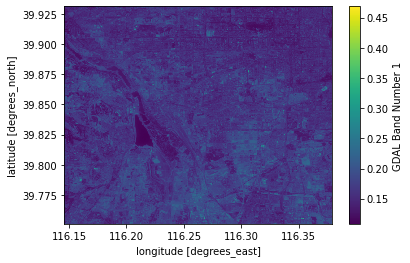

In [38]:
ds.Band1.plot()

In [39]:
!gdal_translate NETCDF:"drive/MyDrive/landsat.nc":Band1 landsat_from_nc.tif

Input file size is 865, 669
0...10...20...30...40...50...60...70...80...90...100 - done.


In [40]:
!ls

Anaconda3-2020.02-Linux-x86_64.sh    drive		  sample_data
Anaconda3-2020.02-Linux-x86_64.sh.1  landsat_from_nc.tif


In [41]:
da = xr.open_rasterio("landsat_from_nc.tif")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  """Entry point for launching an IPython kernel.


In [44]:
da.values

array([[[0.14042899, 0.14258529, 0.14258529, ..., 0.1499751 ,
         0.14995265, 0.15177202],
        [0.1421136 , 0.14838035, 0.14838035, ..., 0.14786373,
         0.15511878, 0.16082399],
        [0.14694281, 0.14891942, 0.14891942, ..., 0.15195172,
         0.14638127, 0.15871261],
        ...,
        [0.15500648, 0.15154742, 0.1541754 , ..., 0.18894573,
         0.1990983 , 0.1990983 ],
        [0.16666397, 0.16762981, 0.16502428, ..., 0.19698693,
         0.20015399, 0.20015399],
        [0.18833928, 0.17010057, 0.16628213, ..., 0.18766543,
         0.18613805, 0.18613805]]], dtype=float32)

In [45]:
cloudImage = ee.Image.loadGeoTIFF("landsat_from_nc.tif")

In [46]:
cloudImage

In [51]:
#!conda install -c conda-forge pyproj
!conda install https://anaconda.org/conda-forge/pyproj/3.3.1/download/linux-aarch64/pyproj-3.3.1-py38h4a6e2e3_1.tar.bz2


pyproj-3.3.1         | : 100% 1.0/1 [00:00<00:00,  1.12it/s]
Preparing transaction: - done
Verifying transaction: | done
Executing transaction: - done
Retrieving notices: ...working... done


In [57]:
# !apt-get install libgeos-3.5.0
# !apt-get install libgeos-dev
#!pip install https://github.com/matplotlib/basemap/archive/master.zip

In [61]:
!pip install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 40.9 MB/s eta 0:00:00



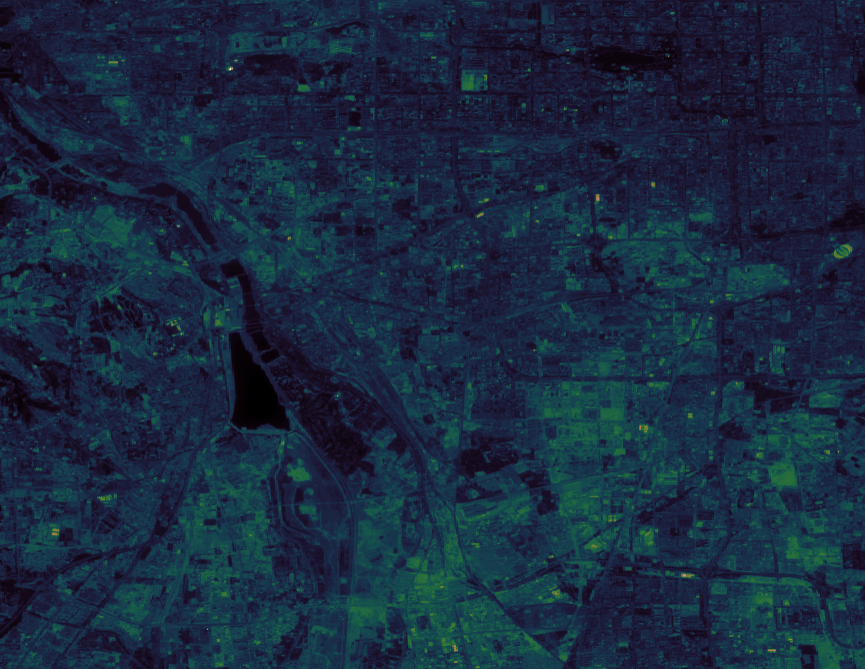

In [66]:
import xarray as xr
import numpy as np
import folium
from cartopy.img_transform import warp_array
import cartopy.crs as ccrs
import matplotlib.cm

data = ds.Band1
data2plot = np.flipud(data.values.astype(np.float64))

lon, lat = np.meshgrid(data.lon.values.astype(np.float64), data.lat.values.astype(np.float64))
source_extent = [lon.min(), lon.max(), lat.min(), lat.max()]
normed_data = (data2plot - np.nanmin(data2plot)) / (np.nanmax(data2plot) - np.nanmin(data2plot))


cm = matplotlib.cm.get_cmap('cubehelix')
colored_data = cm(normed_data)

m = folium.Map(location=[lat.mean(), lon.mean()], zoom_start=10)
folium.raster_layers.ImageOverlay(colored_data,
                     [[lat.min(), lon.min()], [lat.max(), lon.max()]],
                     mercator_project=True,
                     opacity=0.5).add_to(m)
m
#m.save('test_xarray_folium.html')

In [ ]:
import io
from PIL import Image

img_data = m._to_png(5) # time to render the map
img = Image.open(io.BytesIO(img_data))
img.save('image.png')